In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
size = 1000
noise = np.random.normal(loc=0, scale=1.0, size=size)
y = np.empty(shape=size)

a1 = 0.95
y[0] = noise[0]
for i in range(1, size):
    y[i] = a1*y[i-1] + noise[i]

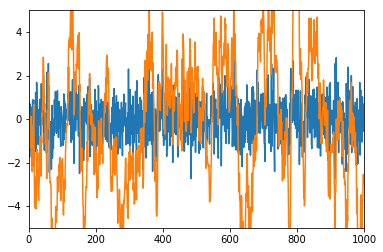

In [3]:
plt.axis([0, size-1, -5, 5])
plt.plot(noise)
plt.plot(y)

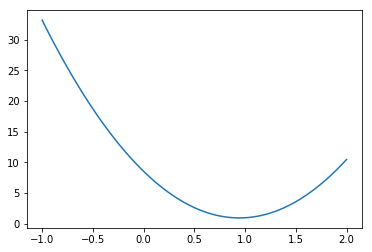

In [4]:
mse = np.empty(100)
for i, a in enumerate(np.linspace(-1, 2, 100)):
    mse[i] = np.mean(np.square(y[1:] - a*y[:-1]))
plt.figure(2)
plt.plot(np.linspace(-1, 2, 100), mse)

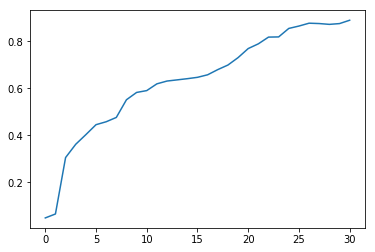

In [16]:
coef = 0
batch_size = 32
learning_rate = 0.01
pred_a1_array = np.empty(shape=size) # save coefficient value for plot
for i in range(1, size-batch_size+1, batch_size):
    data = y[i-1:i-1+batch_size]
    pred_y = coef*data
    error = y[i:i+batch_size] - pred_y
    grad = -np.mean(data*error)
    coef = coef - learning_rate*grad
    pred_a1_array[i//batch_size] = coef # save coefficient value for plot

plt.figure(3)
plt.plot(pred_a1_array[:size//batch_size])